In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Project Description:

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, we have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 



In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


This gives the information about number of null values,columns,data types and memory usage.

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [21]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

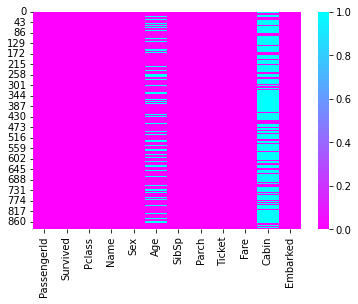

In [4]:
#Let's check the null values using heatmap
sns.heatmap(df.isnull(),cmap="cool_r")

Null values are present in Age , Cabin and Embarked columns.

In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [6]:
df.duplicated().sum()

0

No duplicate rows are present in the dataset.

In [7]:
for i in df.columns:
    print(df[i].value_counts())

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64
0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtyp

These are the value counts of each column.

In [8]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

These are the unique number of values present in each column.

Encoding categorical columns:

In [4]:
#Encoding categorical columns using Label Encoder
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=lab_enc.fit_transform(df[i])
df        

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,NaN,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


In [5]:
#now deal with no null values
df["Age"]=df["Age"].fillna(df["Age"].mean())
df["Cabin"]=df["Cabin"].fillna(df["Cabin"].mean())
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mean())

In [6]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name             int32
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket           int32
Fare           float64
Cabin            int32
Embarked         int32
dtype: object

In [30]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         4
dtype: int64

In [8]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

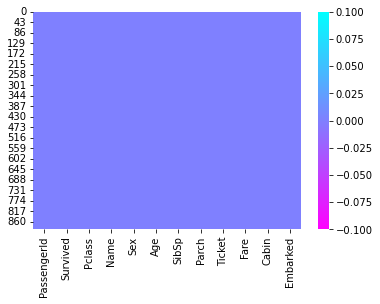

In [15]:
#Let's check the null values again using heatmap
sns.heatmap(df.isnull(),cmap="cool_r")

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.000000,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.000000,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.000000,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.000000,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.000000,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.000000,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.000000,0,0,14,30.0000,30,2
888,889,0,3,413,0,29.699118,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.000000,0,0,8,30.0000,60,0


Now we can see there are no missing values in any of the columns in the dataset

Description of Dataset:

In [7]:
#statistical summary of the dataset
df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,130.744108,1.538721
std,257.353842,0.486592,0.836071,257.353842,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,36.024237,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,147.000000,1.000000
50%,446.000000,0.000000,3.000000,445.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,147.000000,2.000000
75%,668.500000,1.000000,3.000000,667.500000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,147.000000,2.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,147.000000,3.000000


This gives the brief description of the dataset.The summary of the dataset looks perfect since there are no negative/invalid values present.

The counts of all the columns are same which means there are no missing values in the dataset.

The mean value is greater than the median in Survived, SibSp, Parch, Ticket,Fare columns which means the data is skewed to right in these columns.

The mean value is less than the median in Pclass, Sex, Cabin, Embarked columns which means the data is skewed to left in these columns.

The mean and median values are same in PassengerId ,Name,Age columns in which the data is not skewed.

By summarizing the data we can observe there is a huge differences between 75% and max hence there are outliers present in the data.

we can also notice the standard deviation, min,25% percentile values from this describe method.

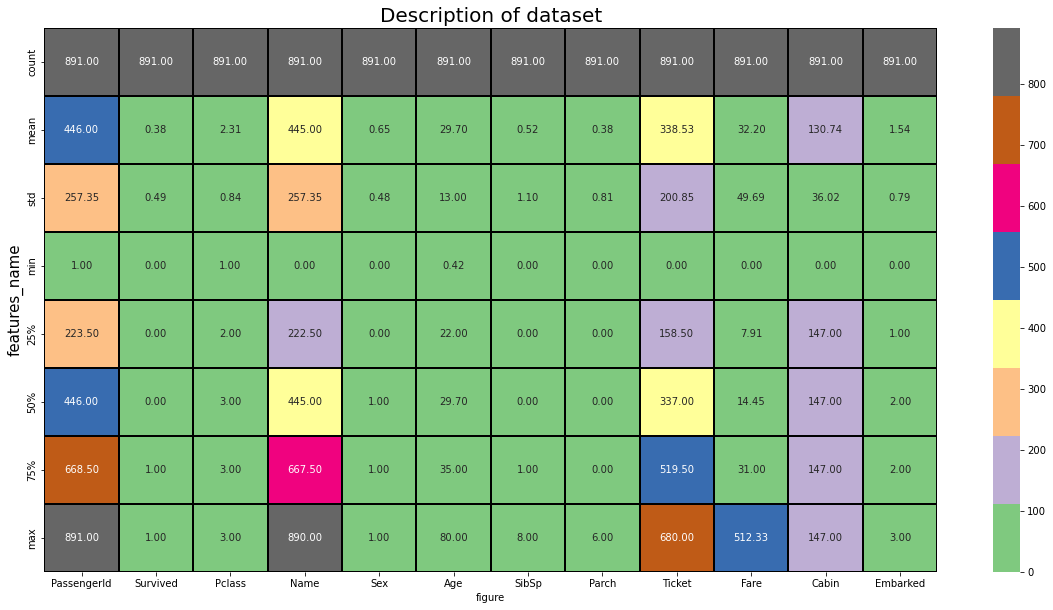

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(), annot=True,fmt="0.2f",linewidth=0.2,linecolor="black",cmap="Accent")
plt.xlabel('figure',fontsize=10)
plt.ylabel("features_name",fontsize=15)
plt.title("Description of dataset",fontsize=20)
plt.show()

Data Visualization:

0    549
1    342
Name: Survived, dtype: int64


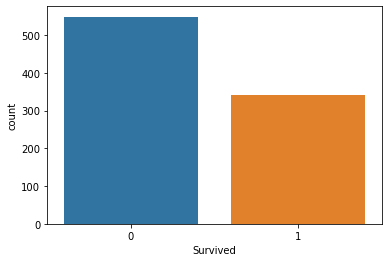

In [24]:
#Let's visualize the number of survived passengers
ax=sns.countplot(x="Survived",data=df)
print(df["Survived"].value_counts())

we can observe the count of survived is less compared to not survived.

3    491
1    216
2    184
Name: Pclass, dtype: int64


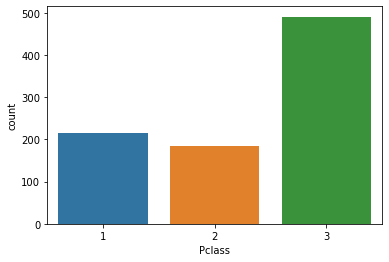

In [11]:
#Let's visualize the number of Pclass passengers
ax=sns.countplot(x="Pclass",data=df)
print(df["Pclass"].value_counts())

Pclass 3 is having more passengers compared to others.

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64


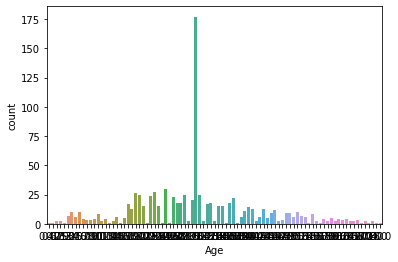

In [12]:
#Let's visualize the ages passengers
ax=sns.countplot(x="Age",data=df)
print(df["Age"].value_counts())

Near to age 30 is more

1    577
0    314
Name: Sex, dtype: int64


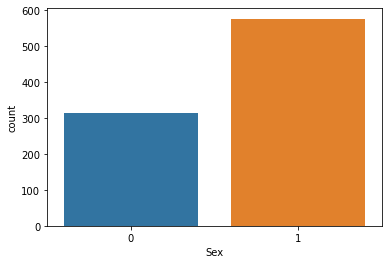

In [13]:
#Let's visualize the Sex column
ax=sns.countplot(x="Sex",data=df)
print(df["Sex"].value_counts())

male passengers are more compared to female passengers.

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


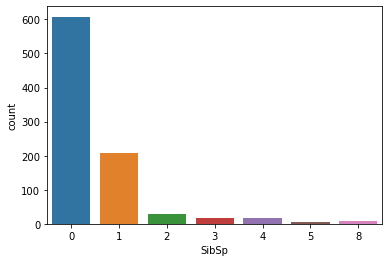

In [14]:
#Let's visualize the number of SibSp passengers
ax=sns.countplot(x="SibSp",data=df)
print(df["SibSp"].value_counts())

SibSp 0 is more compared to others.

333    7
568    7
80     7
249    6
566    6
      ..
513    1
98     1
212    1
606    1
466    1
Name: Ticket, Length: 681, dtype: int64


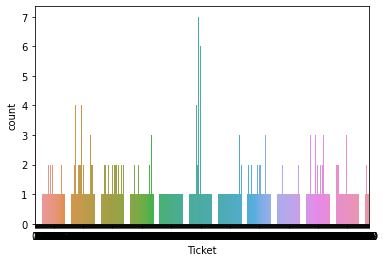

In [15]:
#Let's visualize the Ticket column
ax=sns.countplot(x="Ticket",data=df)
print(df["Ticket"].value_counts())

Ticket numbers 568,333,80 are more compared to others

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


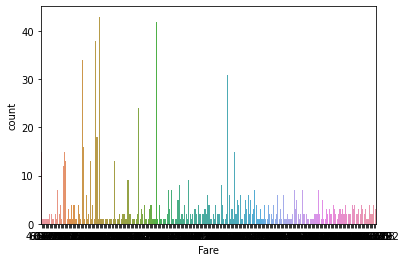

In [16]:
#Let's visualize the Fare of the Ticket of passengers
ax=sns.countplot(x="Fare",data=df)
print(df["Fare"].value_counts())

8.0500 Fare is having for more number of passengers.

147    687
63       4
145      4
47       4
62       3
      ... 
124      1
76       1
72       1
125      1
60       1
Name: Cabin, Length: 148, dtype: int64


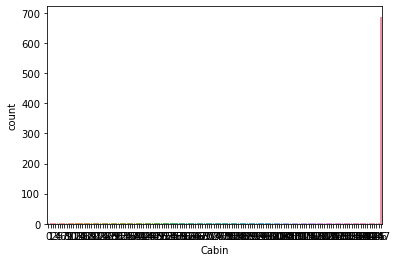

In [17]:
#Let's visualize the Cabin passengers
ax=sns.countplot(x="Cabin",data=df)
print(df["Cabin"].value_counts())

only for Cabin C147 is having more passengers.

2    644
0    168
1     77
3      2
Name: Embarked, dtype: int64


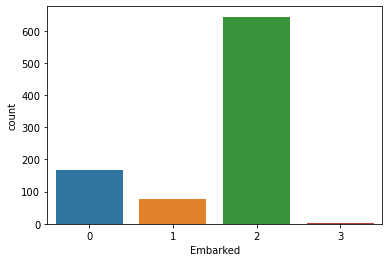

In [18]:
#Let's visualize the Embarked column
ax=sns.countplot(x="Embarked",data=df)
print(df["Embarked"].value_counts())

Embarked 2 is having more compared to others.

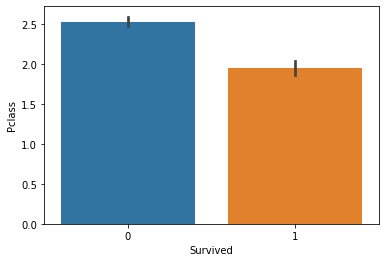

In [20]:
#let's visualize the Survived and Pclass
sns.barplot(x="Survived",y="Pclass",data=df)
plt.show()

Not survived is more in Pclass

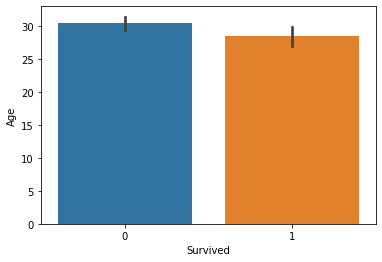

In [22]:
#let's visualize the Survived and Age
sns.barplot(x="Survived",y="Age",data=df)
plt.show()

Here also Not Survived is more

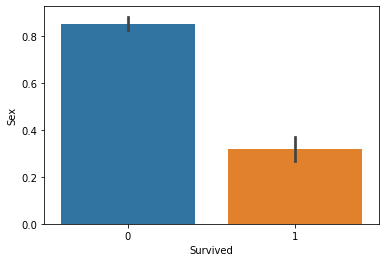

In [23]:
#let's visualize the Survived and Sex
sns.barplot(x="Survived",y="Sex",data=df)
plt.show()

Not survived females are more

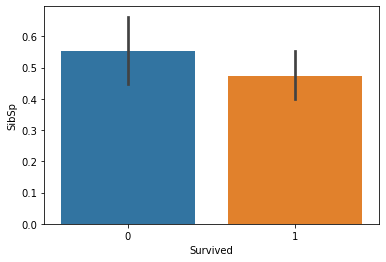

In [24]:
#let's visualize the Survived and SibSp
sns.barplot(x="Survived",y="SibSp",data=df)
plt.show()

Not survived is more in SibSp column

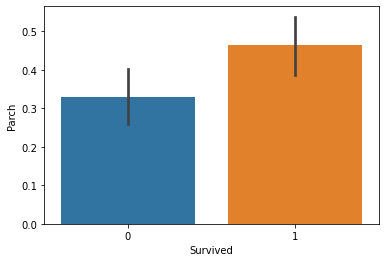

In [25]:
#let's visualize the Survived and Parch
sns.barplot(x="Survived",y="Parch",data=df)
plt.show()

Not Survived is less in Parch column.

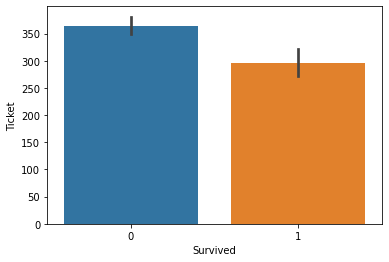

In [30]:
#let's visualize the Survived and Ticket
sns.barplot(x="Survived",y="Ticket",data=df)
plt.show()

Not Survived tickets are more

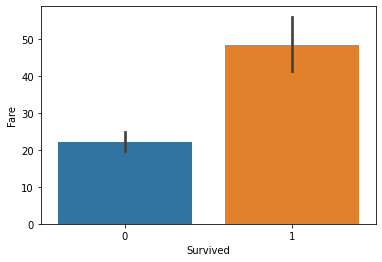

In [27]:
#let's visualize the Survived and Fare
sns.barplot(x="Survived",y="Fare",data=df)
plt.show()

For Survived ,Ticket Fare is more

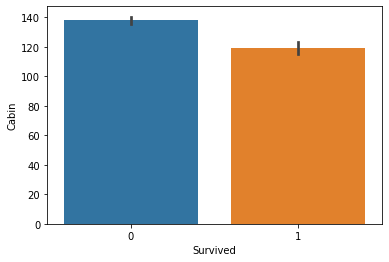

In [28]:
#let's visualize the Survived and Cabin
sns.barplot(x="Survived",y="Cabin",data=df)
plt.show()

In all Cabins,Not Survived is more

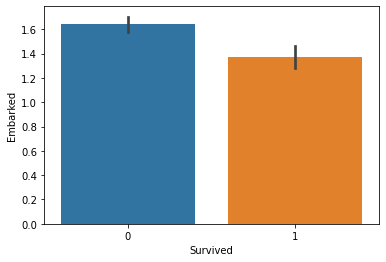

In [29]:
#let's visualize the Survived and Embarked
sns.barplot(x="Survived",y="Embarked",data=df)
plt.show()

In Embarked also,Not Survived is more

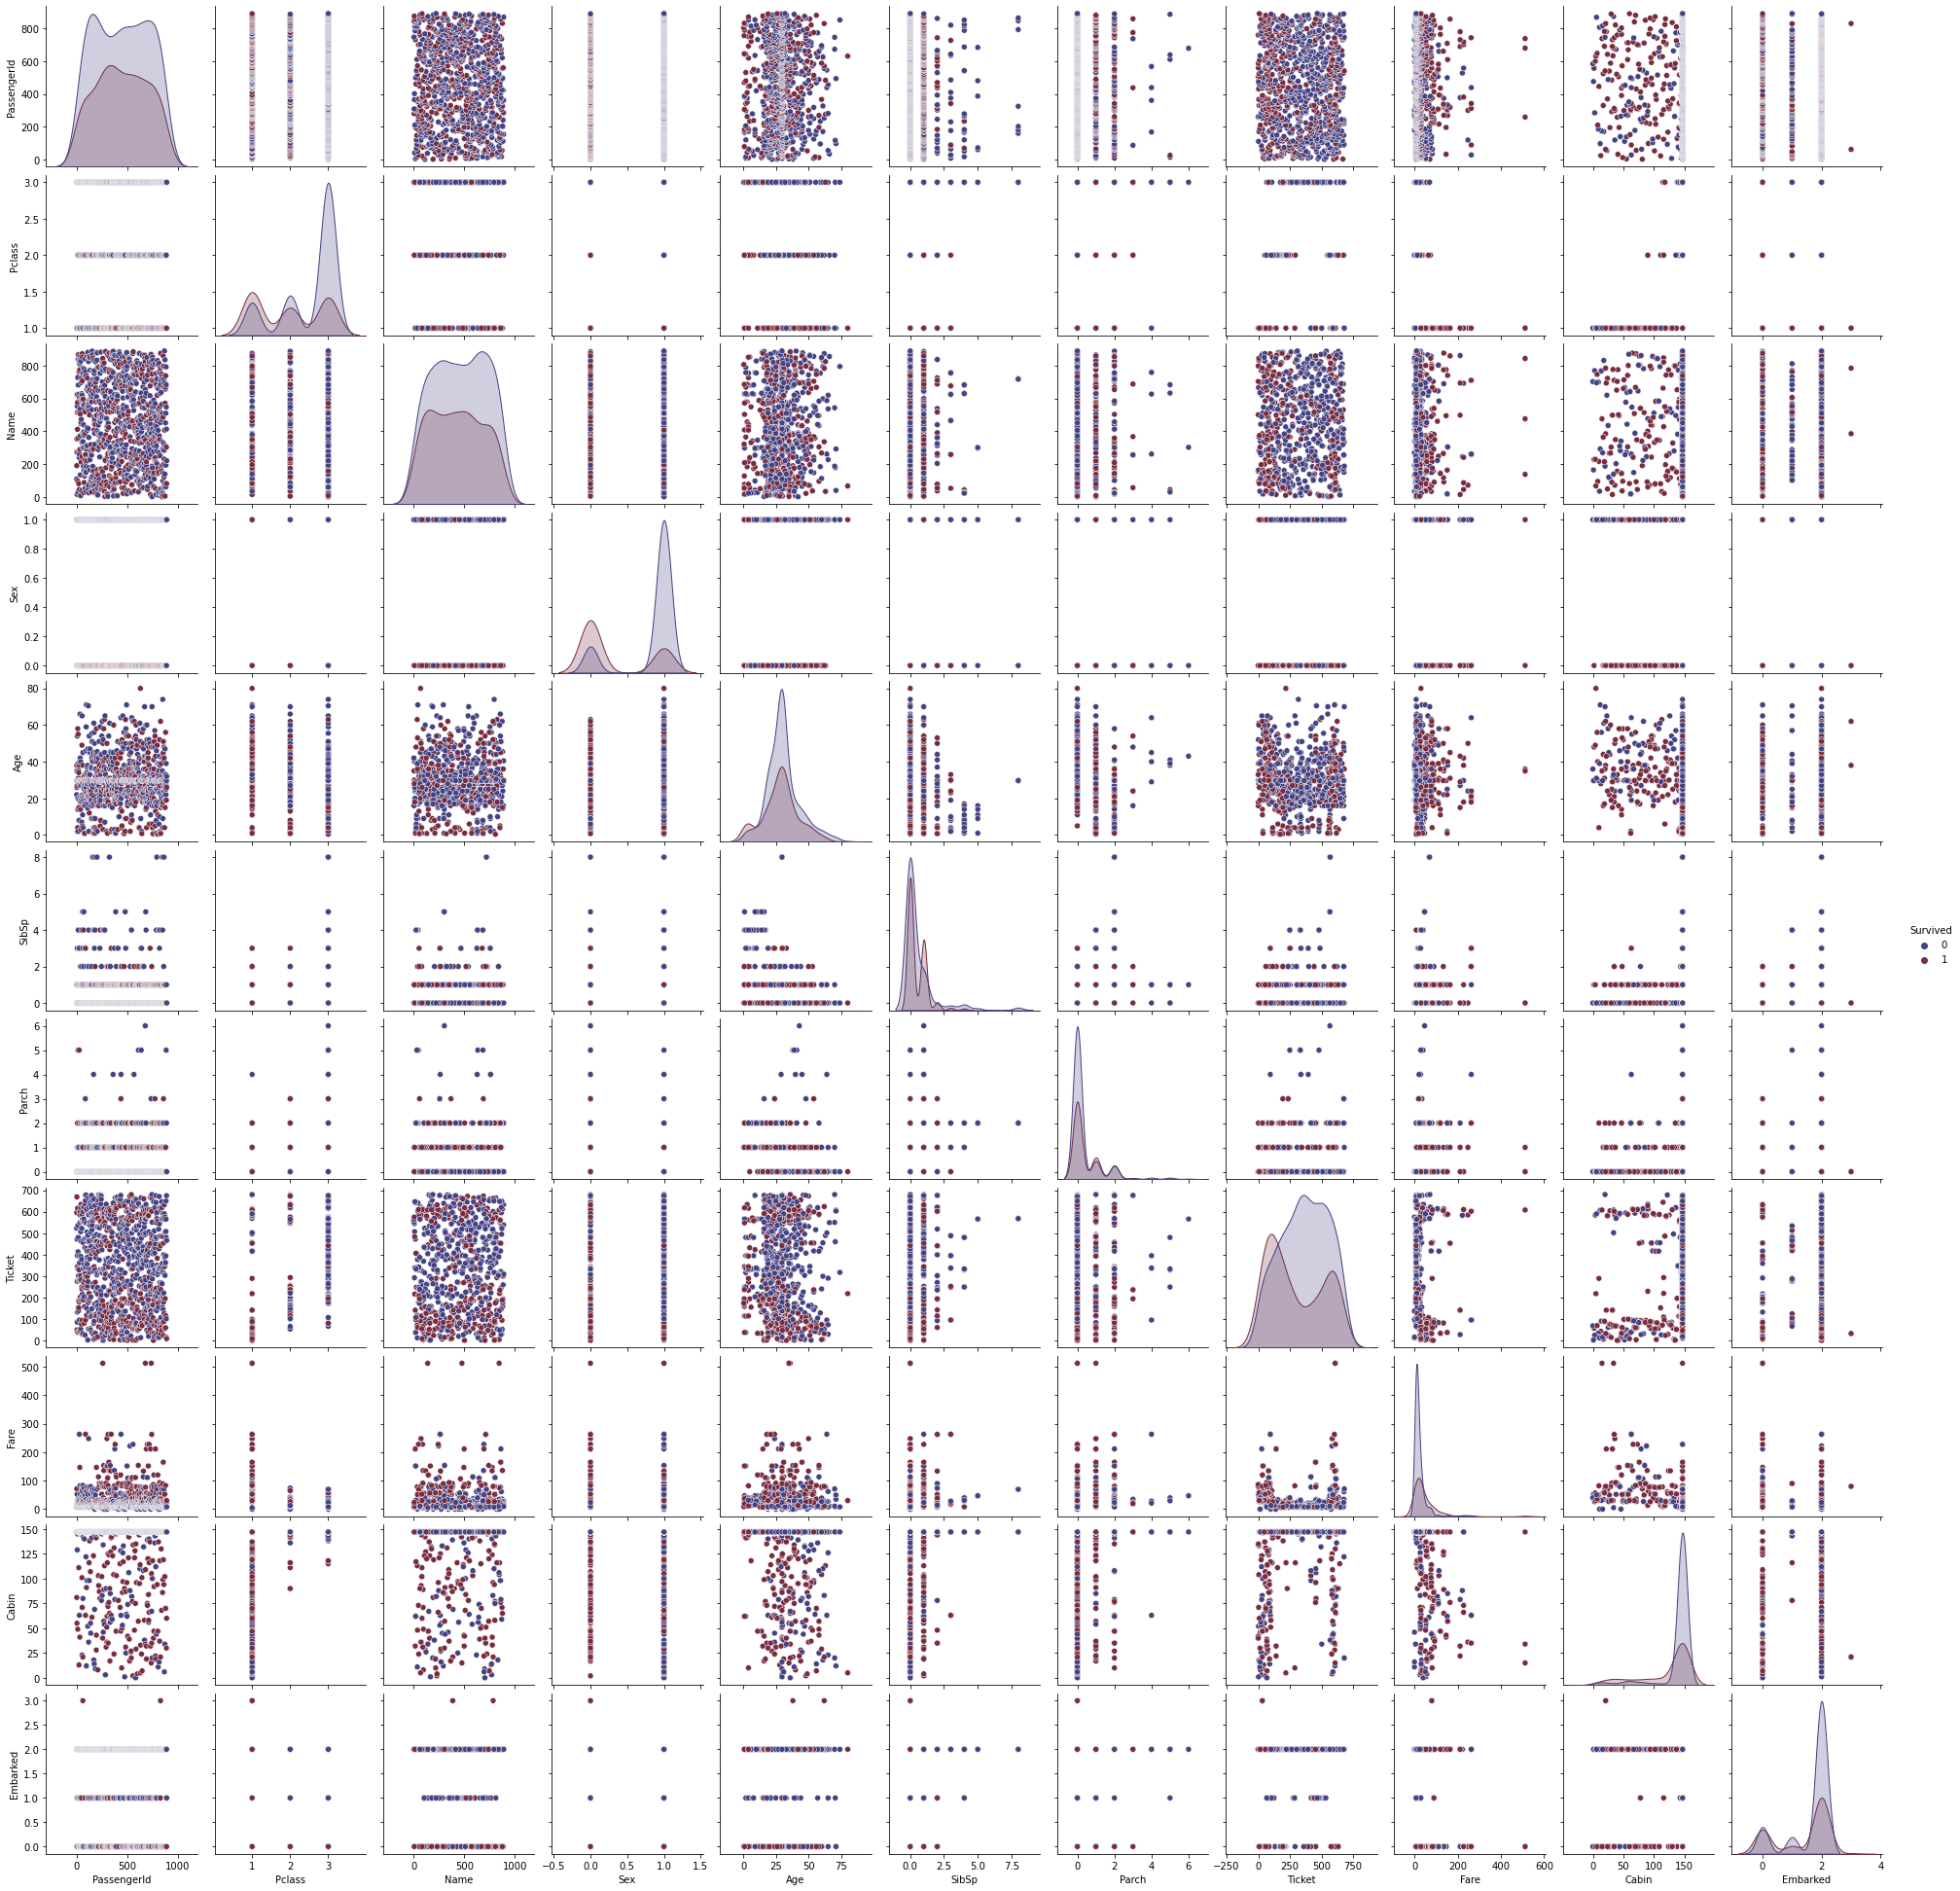

In [31]:
sns.pairplot(df,hue="Survived",palette="icefire")
plt.show()

This pairplot gives the pairwise relation between the features on the basis of target Survived.On the diagonal we can notice the distribution plots.

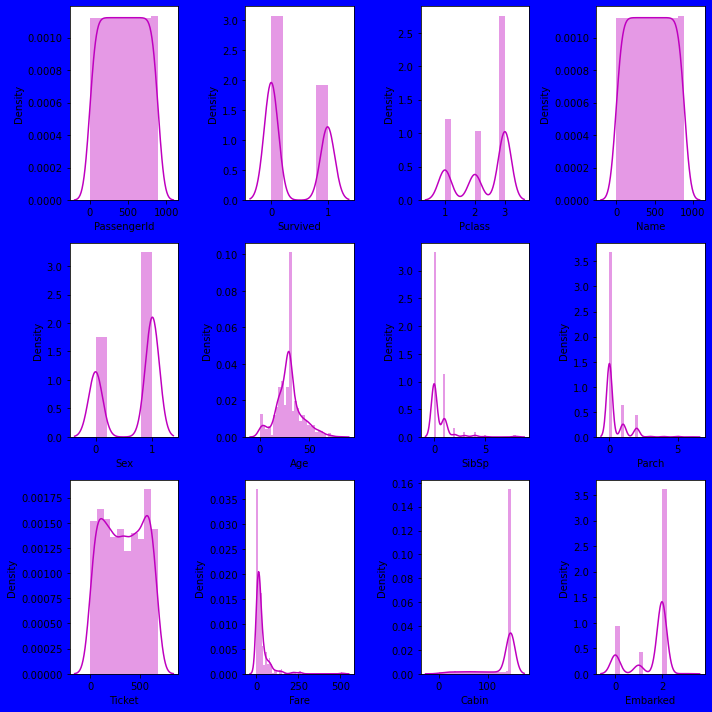

In [33]:
#let's visualize how the data has been distributed in all  the columns.
plt.figure(figsize=(10,10),facecolor="blue")
plotnumber=1
for column in df.columns:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[column],color="m")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
    plt.tight_layout()

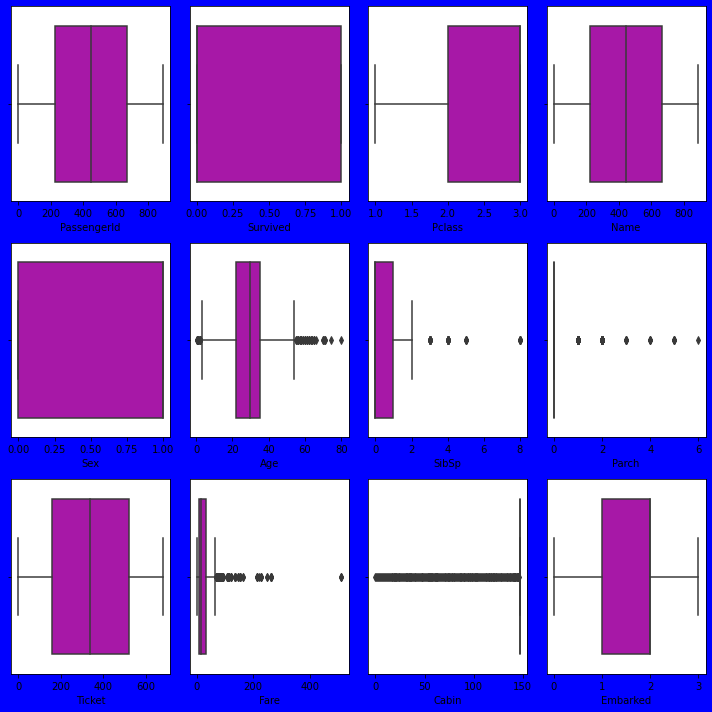

In [19]:
#let's visualize  the data to check the outliers by plotting boxplot  for all  the columns.
plt.figure(figsize=(10,10),facecolor="blue")
plotnumber=1
for column in df.columns:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(df[column],color="m")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
    plt.tight_layout()

In  SibSp,Parch and Cabin columns,all are outliers, data not looks normal.

In Age and Fare columns, also we can see the outliers.

In [7]:
#now removing the data above zscore
from scipy.stats import zscore
columns=df[["Age","Fare","Parch","Cabin","SibSp"]]
z_score=zscore(columns)
abs_z_score=np.abs(z_score)
b=((abs_z_score<3).all(axis=1))
df1=df[b]
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.000000,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.000000,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.000000,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.000000,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.000000,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.000000,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.000000,0,0,14,30.0000,30,2
888,889,0,3,413,0,29.699118,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.000000,0,0,8,30.0000,60,0


In [8]:
#threshold=3
np.where(abs_z_score>3)

(array([ 13,  16,  23,  25,  27,  50,  59,  61,  68,  71,  86,  88,  96,
         96, 116, 118, 119, 159, 164, 167, 170, 171, 174, 180, 182, 185,
        201, 209, 233, 258, 261, 266, 278, 284, 299, 311, 324, 329, 341,
        360, 377, 380, 386, 437, 438, 438, 445, 475, 480, 493, 523, 527,
        540, 541, 542, 556, 557, 567, 583, 599, 610, 630, 630, 638, 647,
        672, 678, 679, 683, 686, 689, 690, 700, 716, 730, 736, 737, 737,
        742, 745, 745, 774, 779, 779, 781, 787, 792, 806, 813, 815, 824,
        829, 846, 850, 851, 858, 863, 867, 885], dtype=int64),
 array([2, 4, 3, 2, 1, 4, 4, 3, 4, 4, 2, 1, 0, 3, 0, 1, 4, 4, 4, 2, 3, 4,
        3, 4, 4, 3, 4, 3, 4, 1, 4, 4, 4, 3, 1, 1, 4, 3, 1, 2, 1, 1, 4, 2,
        1, 2, 3, 3, 4, 0, 3, 1, 3, 4, 4, 3, 1, 2, 3, 3, 2, 0, 3, 2, 3, 0,
        2, 1, 4, 4, 1, 3, 1, 1, 1, 2, 1, 3, 1, 0, 3, 2, 1, 3, 3, 4, 4, 3,
        4, 3, 4, 3, 4, 4, 0, 2, 4, 3, 2], dtype=int64))

In [10]:
print("Data loss percentage:",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss percentage: 10.437710437710438


In [14]:
df.shape

(891, 12)

In [9]:
#Let's check the skewness
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Cabin         -2.167313
Embarked      -1.246689
dtype: float64

SibSp,Parch,Fare,Cabin,Embarked ,Sex,Pclass columns have skewness.Let us remove skewness using sqrt method

In [10]:
df["Sex"]=np.sqrt(df["Sex"])
df["SibSp"]=np.sqrt(df["SibSp"])
df["Parch"]=np.sqrt(df["Parch"])
df["Fare"]=np.sqrt(df["Fare"])
df["Cabin"]=np.sqrt(df["Cabin"])
df["Embarked"]=np.sqrt(df["Embarked"])

In [11]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.434488
SibSp          1.436526
Parch          1.529799
Ticket         0.000246
Fare           2.085004
Cabin         -2.629785
Embarked      -1.450908
dtype: float64

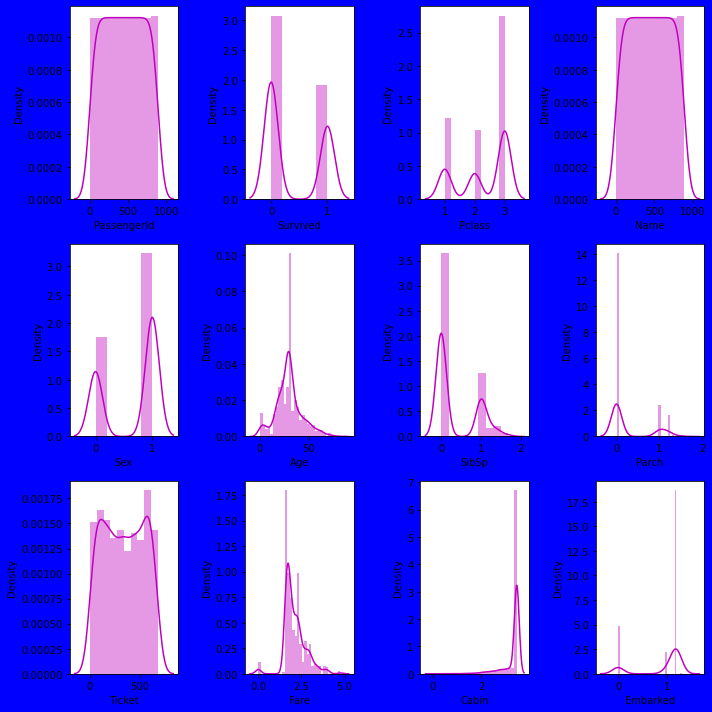

In [16]:
#Let us visualize again after removing skewness.
#let's visualize how the data has been distributed in all  the columns.
plt.figure(figsize=(10,10),facecolor="blue")
plotnumber=1
for column in df.columns:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[column],color="m")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
    plt.tight_layout()

Still some skewness is present in  SibSp,Parch,Sex,Pclass,Cabin,Embarked columns after removing skewness also.But before encoding, Sex, cabin and Embarked are categorical columns.

In [12]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.033207,-0.063602,0.000348,-0.056554,0.004035,-0.038232,0.008342
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.069809,0.043535,0.121652,-0.164549,0.312508,-0.230543,-0.168727
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.331339,0.006049,-0.006792,0.319869,-0.660850,0.643016,0.196346
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.057466,-0.063613,-0.048194,0.047348,-0.059134,0.060984,-0.003234
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.084153,-0.173428,-0.257096,0.059372,-0.237325,0.077470,0.097480
Age,0.033207,-0.069809,-0.331339,0.057466,0.084153,1.000000,-0.217329,-0.237261,-0.068848,0.108745,-0.228410,-0.027313
SibSp,-0.063602,0.043535,0.006049,-0.063613,-0.173428,-0.217329,1.000000,0.473591,0.038168,0.309346,0.016449,0.023401
Parch,0.000348,0.121652,-0.006792,-0.048194,-0.257096,-0.237261,0.473591,1.000000,0.007631,0.320344,-0.034738,0.007558
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.068848,0.038168,0.007631,1.000000,-0.075575,0.236856,0.005910
Fare,0.004035,0.312508,-0.660850,-0.059134,-0.237325,0.108745,0.309346,0.320344,-0.075575,1.000000,-0.515059,-0.251585


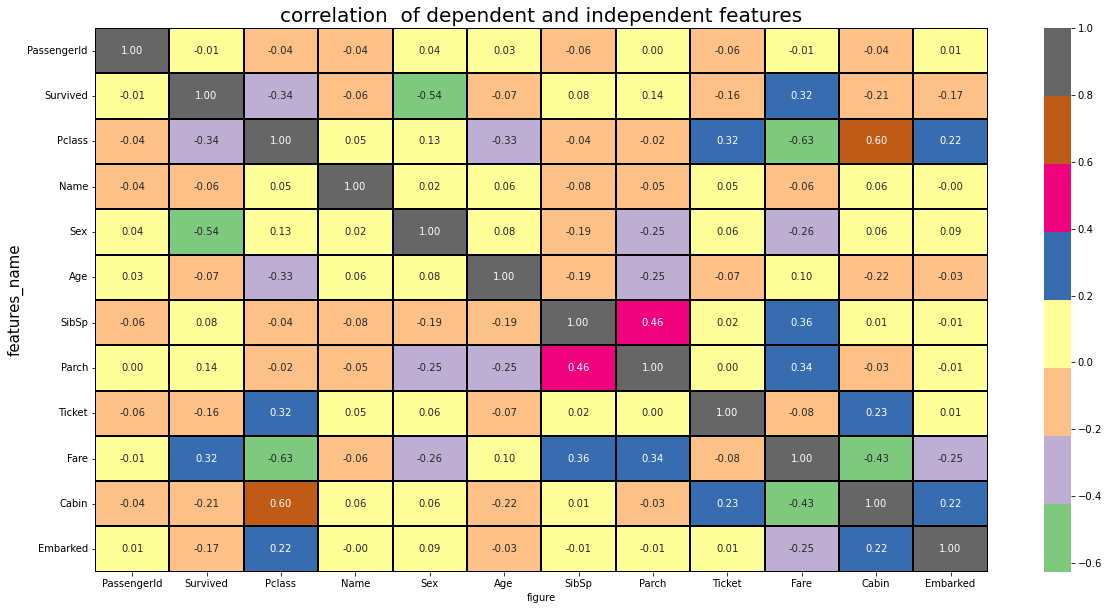

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True,fmt="0.2f",linewidth=0.2,linecolor="black",cmap="Accent")
plt.xlabel('figure',fontsize=10)
plt.ylabel("features_name",fontsize=15)
plt.title("correlation  of dependent and independent features",fontsize=20)
plt.show()

In [13]:
sort_values=df.corr()['Survived'].sort_values(ascending=False)
sort_values

Survived       1.000000
Fare           0.312508
Parch          0.121652
SibSp          0.043535
PassengerId   -0.005007
Name          -0.057343
Age           -0.069809
Ticket        -0.164549
Embarked      -0.168727
Cabin         -0.230543
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

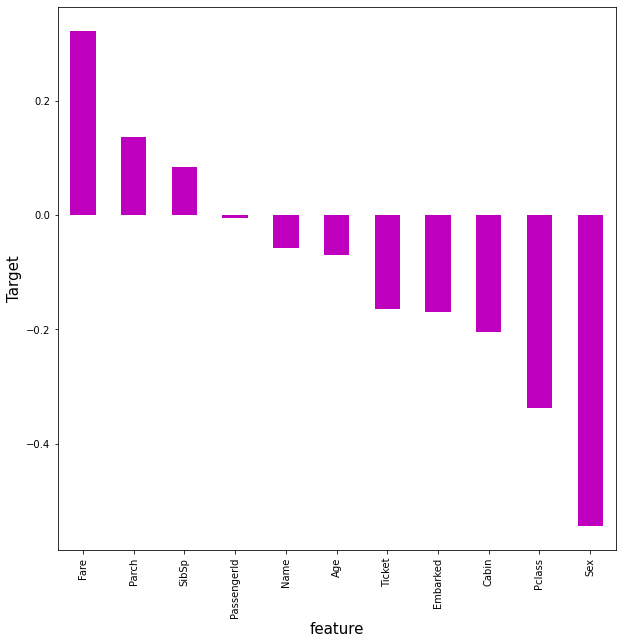

In [20]:
#visualizing the correlation between features and target
plt.figure(figsize=(10,10))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind="bar",color="m")
plt.xlabel('feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.show()

Here we can see the positive and negative correlated features with the target.

In [14]:
#seperating Features and Label
X=df.drop("Survived",axis=1)
Y=df["Survived"]

Feature Scaling using Standard Scaler:

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,-1.730108,0.827377,-1.310217,0.737695,-0.592481,1.004410,-0.539747,0.918966,-0.733117,0.421664,0.549872
1,-1.726220,-1.566107,-0.991410,-1.355574,0.638789,1.004410,-0.539747,1.282625,1.219822,-1.069097,-2.027337
2,-1.722332,0.827377,-0.357685,-1.355574,-0.284663,-0.629537,-0.539747,1.646283,-0.691495,0.421664,0.549872
3,-1.718444,-1.566107,-0.672604,-1.355574,0.407926,1.004410,-0.539747,-1.442322,0.827232,-1.824796,0.549872
4,-1.714556,0.827377,-1.671790,0.737695,0.407926,-0.629537,-0.539747,0.664904,-0.683984,0.421664,0.549872
...,...,...,...,...,...,...,...,...,...,...,...
886,1.714556,-0.369365,0.400452,0.737695,-0.207709,-0.629537,-0.539747,-1.183277,-0.423054,0.421664,0.549872
887,1.718444,-1.566107,-0.552079,-1.355574,-0.823344,-0.629537,-0.539747,-1.616678,0.212604,-2.749962,0.549872
888,1.722332,0.827377,-0.124412,-1.355574,0.000000,1.004410,2.061805,1.676173,-0.002955,0.421664,0.549872
889,1.726220,-1.566107,-1.415189,0.737695,-0.284663,-0.629537,-0.539747,-1.646568,0.212604,-1.667449,-2.027337


Checking Variance Inflation Factor:

In [16]:
#Finding variance inflation factor in each scaled column.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["features"]=x.columns
vif

,VIF values,features
0,1.012841,PassengerId
1,2.892773,Pclass
2,1.015748,Name
3,1.119585,Sex
4,1.239398,Age
5,1.439407,SibSp
6,1.484022,Parch
7,1.182334,Ticket
8,2.620092,Fare
9,1.796463,Cabin


By checking the vif values,we can see that the multi collinearity is not present in the dataset. 

In [20]:
x.shape

(891, 9)

In [21]:
Y.shape

(891,)

In [17]:
Y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Here we can see the data is imbalanced,so we are using RandomOverSampler method to balance the data

OverSampling the data:

In [18]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [19]:
from imblearn.over_sampling import RandomOverSampler
rs=RandomOverSampler()
x1,y1=rs.fit_resample(x,Y)

In [20]:
y1.value_counts()

0    549
1    549
Name: Survived, dtype: int64

Modelling:

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [22]:
#creating train test split.
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=200)

In [23]:
def m_score(name,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=name.predict(x_train)
        print("Training result")
        print(f"Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%")
    else:
         if train==False:
            pred=name.predict(x_test)
            print("\n----Test Result----")
            print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
            print("confusion_matrix:\n\n",confusion_matrix(y_test,pred))
            print("\n Test classification report:\n\n",classification_report(y_test,pred,digits=2))


In [24]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [25]:
#Model initiation for RandomForestClassifier
name=RandomForestClassifier()
name.fit(x_train,y_train)

RandomForestClassifier()

Finding the best Random state:

In [26]:
mAccuracy=0
mRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=i)
    pred=name.predict(x_test)
    Test_result=accuracy_score(y_test,pred)
    if Test_result>mAccuracy:
        mAccuracy=Test_result
        mRS=i
print("Best accuracy is",mAccuracy,"at random state",mRS)    

Best accuracy is 0.8363636363636363 at random state 168


In [27]:
m_score(name,x_train,x_test,y_train,y_test,train=True)
m_score(name,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:79.22%

----Test Result----
Accuracy score:74.55%
confusion_matrix:

 [[ 97  33]
 [ 37 108]]

 Test classification report:

               precision    recall  f1-score   support

           0       0.72      0.75      0.73       130
           1       0.77      0.74      0.76       145

    accuracy                           0.75       275
   macro avg       0.74      0.75      0.75       275
weighted avg       0.75      0.75      0.75       275



The accuracy score using RandomForestClassifier is 74.55%

In [28]:
#checking cv score for RandomForestClassifier
score=cross_val_score(name,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test,pred)-score.mean())

[0.6        0.69090909 0.70454545 0.89497717 0.52054795]
0.6821959319219594
Difference between Accuracy score and cross validation score is: 0.0632586135325861


In [29]:
#Model initiation for SupportVectorMachineClassifier
name1=SVC()
name1.fit(x_train,y_train)

SVC()

In [30]:
m_score(name1,x_train,x_test,y_train,y_test,train=True)
m_score(name1,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:86.51%

----Test Result----
Accuracy score:80.36%
confusion_matrix:

 [[109  21]
 [ 33 112]]

 Test classification report:

               precision    recall  f1-score   support

           0       0.77      0.84      0.80       130
           1       0.84      0.77      0.81       145

    accuracy                           0.80       275
   macro avg       0.80      0.81      0.80       275
weighted avg       0.81      0.80      0.80       275



The accuracy score using SupportVectorMachineClassifier is 80.36%

In [31]:
#checking cv score for SupportVectorMachineClassifier
score1=cross_val_score(name1,x1,y1)
print(score1)
print(score1.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test,pred)-score1.mean())

[0.78636364 0.80909091 0.78181818 0.88127854 0.81278539]
0.8142673308426733
Difference between Accuracy score and cross validation score is: -0.06881278538812785


In [32]:
#Model initiation for GradientBoostingClassifier
name2=GradientBoostingClassifier()
name2.fit(x_train,y_train)

GradientBoostingClassifier()

In [33]:
m_score(name2,x_train,x_test,y_train,y_test,train=True)
m_score(name2,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:92.22%

----Test Result----
Accuracy score:82.18%
confusion_matrix:

 [[110  20]
 [ 29 116]]

 Test classification report:

               precision    recall  f1-score   support

           0       0.79      0.85      0.82       130
           1       0.85      0.80      0.83       145

    accuracy                           0.82       275
   macro avg       0.82      0.82      0.82       275
weighted avg       0.82      0.82      0.82       275



The accuracy score using GradientBoostingClassifier is 82.18%

In [34]:
#checking cv score for GradientBoostingClassifier
score2=cross_val_score(name2,x1,y1)
print(score2)
print(score2.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test,pred)-score2.mean())

[0.47727273 0.43636364 0.36818182 0.50228311 0.46575342]
0.44997094229970946
Difference between Accuracy score and cross validation score is: 0.295483603154836


In [35]:
#Model initiation for AdaBoostClassifier
name3=AdaBoostClassifier()
name3.fit(x_train,y_train)

AdaBoostClassifier()

In [36]:
m_score(name3,x_train,x_test,y_train,y_test,train=True)
m_score(name3,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:85.18%

----Test Result----
Accuracy score:78.18%
confusion_matrix:

 [[105  25]
 [ 35 110]]

 Test classification report:

               precision    recall  f1-score   support

           0       0.75      0.81      0.78       130
           1       0.81      0.76      0.79       145

    accuracy                           0.78       275
   macro avg       0.78      0.78      0.78       275
weighted avg       0.78      0.78      0.78       275



The accuracy score using   AdaBoostClassifier is 78.18%

In [37]:
#checking cv score for AdaBoostClassifier
score3=cross_val_score(name3,x1,y1)
print(score3)
print(score3.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test,pred)-score3.mean())

[0.42727273 0.45       0.44090909 0.47945205 0.46575342]
0.4526774595267746
Difference between Accuracy score and cross validation score is: 0.2927770859277709


In [38]:
#Model initiation for DecisionTreeClassifier
name4=DecisionTreeClassifier()
name4.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
m_score(name4,x_train,x_test,y_train,y_test,train=True)
m_score(name4,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:100.00%

----Test Result----
Accuracy score:84.73%
confusion_matrix:

 [[109  21]
 [ 21 124]]

 Test classification report:

               precision    recall  f1-score   support

           0       0.84      0.84      0.84       130
           1       0.86      0.86      0.86       145

    accuracy                           0.85       275
   macro avg       0.85      0.85      0.85       275
weighted avg       0.85      0.85      0.85       275



The accuracy score using  DecisionTreeClassifier is 84.73%

In [40]:
#checking cv score for DecisionTreeClassifier
score4=cross_val_score(name4,x1,y1)
print(score4)
print(score4.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test,pred)-score4.mean())

[0.52727273 0.52727273 0.48181818 0.84018265 0.52968037]
0.5812453300124533
Difference between Accuracy score and cross validation score is: 0.16420921544209222


In [41]:
#Model initiation for ExtraTreeClassifier
name5=ExtraTreesClassifier()
name5.fit(x_train,y_train)

ExtraTreesClassifier()

In [42]:
m_score(name5,x_train,x_test,y_train,y_test,train=True)
m_score(name5,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:100.00%

----Test Result----
Accuracy score:86.18%
confusion_matrix:

 [[116  14]
 [ 24 121]]

 Test classification report:

               precision    recall  f1-score   support

           0       0.83      0.89      0.86       130
           1       0.90      0.83      0.86       145

    accuracy                           0.86       275
   macro avg       0.86      0.86      0.86       275
weighted avg       0.86      0.86      0.86       275



The accuracy score using  ExtraTreesClassifier is 86.18%

In [43]:
#checking cv score for ExtraTreesClassifier
score5=cross_val_score(name5,x1,y1)
print(score5)
print(score5.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test,pred)-score5.mean())

[0.81818182 0.79545455 0.79545455 0.94063927 0.78538813]
0.8270236612702366
Difference between Accuracy score and cross validation score is: -0.08156911581569115


In [44]:
#Model initiation for BaggingClassifier
name6=BaggingClassifier()
name6.fit(x_train,y_train)

BaggingClassifier()

In [50]:
m_score(name6,x_train,x_test,y_train,y_test,train=True)
m_score(name6,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:99.27%

----Test Result----
Accuracy score:88.73%
confusion_matrix:

 [[118  12]
 [ 19 126]]

 Test classification report:

               precision    recall  f1-score   support

           0       0.86      0.91      0.88       130
           1       0.91      0.87      0.89       145

    accuracy                           0.89       275
   macro avg       0.89      0.89      0.89       275
weighted avg       0.89      0.89      0.89       275



The accuracy score using Bagging Classifier is 88.73%

In [45]:
#checking cv score for BaggingClassifier
score6=cross_val_score(name6,x1,y1)
print(score6)
print(score6.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test,pred)-score6.mean())

[0.58181818 0.59090909 0.50909091 0.88584475 0.52968037]
0.6194686591946865
Difference between Accuracy score and cross validation score is: 0.12598588625985896


BaggingClassifier is our best model,as the difference between accuracy score and cv score is least.

BaggingClassifier is our best model and we will do Hyper parameter tuning for this model.

Hyper Parameter Tuning:

In [49]:
#let's use  BaggingClassifier over DecisionTreeClassifier and see the score if improves. 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

In [50]:
dt = DecisionTreeClassifier(max_depth=1)
bc = BaggingClassifier(dt, n_estimators=500, max_samples=0.5, max_features=0.5)

In [104]:
parameters = {
    'base_estimator__max_depth': [1, 2, 3, 4, 5],
    'max_samples': [0.05, 0.1, 0.2,0.5]
}

In [105]:
gsv=GridSearchCV(BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_features=0.5),parameters,scoring='accuracy')
                   
                   

In [106]:
gsv.fit(x_train,y_train)

GridSearchCV(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         max_features=0.5, n_estimators=500),
             param_grid={'base_estimator__max_depth': [1, 2, 3, 4, 5],
                         'max_samples': [0.05, 0.1, 0.2, 0.5]},
             scoring='accuracy')

In [107]:
gsv.best_params_

{'base_estimator__max_depth': 5, 'max_samples': 0.5}

In [110]:
pasting_dt=bc
pasting_dt.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                  max_features=0.5, max_samples=0.5, n_estimators=500)

In [111]:
Final_model=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                  max_features=0.5, max_samples=0.5, n_estimators=500)
Final_model.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                  max_features=0.5, max_samples=0.5, n_estimators=500)

In [112]:
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

73.45454545454545


AUC ROC Curve:

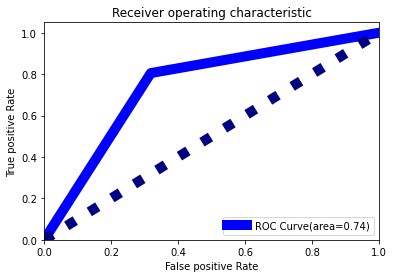

In [115]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color="blue",linewidth=10,label="ROC Curve(area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="dotted")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [116]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve


Here we have plotted the ROC Curve for the final model and the AUC value for the model is 73.47%

In [120]:
#saving the model using .pkl
import joblib
joblib.dump(Final_model,"Titanic_Survived_project.pkl")

['Titanic_Survived_project.pkl']

In [121]:
#predicting the saved model
model=joblib.load("Titanic_Survived_project.pkl")
prediction=model.predict(x_test)
prediction

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

These are the predicted values of the survived.

In [123]:
a=np.array(y_test)
df=pd.DataFrame()
df["predicted"]=prediction
df["original"]=a
df

,predicted,original
0,0,1
1,0,1
2,0,1
3,1,1
4,0,0
...,...,...
270,1,1
271,1,1
272,1,1
273,1,0


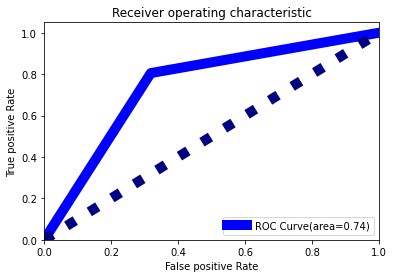

In [124]:
plt.plot(fpr,tpr,color="blue",linewidth=10,label="ROC Curve(area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="dotted")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Here we have plotted the ROC Curve for  the final model and the AUC value for the best model is 74%